## Include file that has all the necessary libraries

In [1]:
%run supportvectors-common.ipynb



<center><img src="https://d4x5p7s4.rocketcdn.me/wp-content/uploads/2016/03/logo-poster-smaller.png"/> </center>
<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



 
# Line & area plots with `Matplotlib`

Line plots, area plots and vlines are rather ubiquitous in data science. Let us study them in some depth. We will start with an interesting dataset: the "Global Temperature Deviations" dataset, and visualize it.

## Learning goals

In this exercise, we will learn to visualize line plots, area plots and vlines using `matplotlib`. 

## Load and explore the data

The following data set is curated by NASA as part of its GISS Surface Temperature Analysis. In this dataset, the temperature deviations (in celcius) from the 1951-1980 means is recorded for every year (monthly, seasonally and annually) between 1880 to the present. 

Dataset columns:
* 0 - `Year`
* 1-12 - Monthly means
* 13 - `J-D` - annual mean deviation
* 14 - `DJF` - mean deviation of {December, January, February}
* 15 - `MAM` - mean deviation of {March, April, May}
* 16 - `JJA` - mean deviation of {June July August}
* 17 - `SON` - mean deviation of {September, October, November}
`

Data source: 
https://data.giss.nasa.gov/gistemp/


In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/viz-datasets/main/GLB.Ts%2BdSST.csv'
data = pd.read_csv(source)
data

Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880 -0.17 -0.24 -0.08 -0.15 -0.09 -0.20 -0.17 -0.09 -0.14 -0.23 -0.21   
1    1881 -0.19 -0.13  0.04  0.06  0.07 -0.18  0.01 -0.03 -0.15 -0.21 -0.18   
2    1882  0.17  0.14  0.05 -0.15 -0.13 -0.22 -0.16 -0.07 -0.15 -0.23 -0.16   
3    1883 -0.29 -0.36 -0.12 -0.18 -0.17 -0.06 -0.07 -0.13 -0.22 -0.11 -0.24   
4    1884 -0.13 -0.08 -0.36 -0.40 -0.33 -0.34 -0.32 -0.27 -0.27 -0.25 -0.33   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
137  2017  1.02  1.14  1.16  0.95  0.91  0.72  0.82  0.87  0.77  0.90  0.88   
138  2018  0.81  0.85  0.89  0.89  0.83  0.78  0.83  0.77  0.80  1.02  0.82   
139  2019  0.93  0.96  1.18  1.01  0.85  0.91  0.95  0.95  0.93  1.02  1.00   
140  2020  1.17  1.25  1.17  1.13  1.02  0.93  0.91  0.88  0.99  0.89  1.11   
141  2021  0.82  0.64  0.89  0.76  0.79  0.85  0.93  0.82  0.92  1.00  0.93   

      Dec   J-D   DJF   MAM   JJA   SON  
0   -0.17 -0.16 -0.16 -0.11 -0.16 -0.19  
1   -0.06 -0.08 -0.16  0.06 -0.07 -0.18  
2   -0.36 -0.11  0.08 -0.08 -0.15 -0.18  
3   -0.11 -0.17 -0.34 -0.16 -0.09 -0.19  
4   -0.30 -0.28 -0.10 -0.36 -0.31 -0.28  
..    ...   ...   ...   ...   ...   ...  
137  0.94  0.92  1.01  1.01  0.80  0.85  
138  0.92  0.85  0.87  0.87  0.79  0.88  
139  1.10  0.98  0.94  1.01  0.94  0.98  
140  0.82  1.02  1.17  1.11  0.90  1.00  
141  0.86  0.85  0.76  0.82  0.87  0.95  

[142 rows x 18 columns]

In [3]:
data.describe().T


count         mean        std      min        25%       50%        75%  \
Year  142.0  1950.500000  41.135953  1880.00  1915.2500  1950.500  1985.7500   
Jan   142.0     0.052958   0.412549    -0.81    -0.2400    -0.020     0.3000   
Feb   142.0     0.060070   0.417533    -0.63    -0.2400    -0.040     0.3700   
Mar   142.0     0.074718   0.418072    -0.64    -0.2275     0.005     0.3000   
Apr   142.0     0.052394   0.385341    -0.58    -0.2475    -0.035     0.2775   
May   142.0     0.042465   0.366568    -0.55    -0.2375    -0.045     0.2700   
Jun   142.0     0.027042   0.360728    -0.52    -0.2400    -0.055     0.2300   
Jul   142.0     0.051408   0.340695    -0.50    -0.1900    -0.035     0.2200   
Aug   142.0     0.049366   0.356001    -0.54    -0.2200    -0.050     0.2200   
Sep   142.0     0.053028   0.353704    -0.59    -0.1900    -0.060     0.2250   
Oct   142.0     0.078944   0.361729    -0.57    -0.2000     0.005     0.2300   
Nov   142.0     0.074225   0.371083    -0.54    -0.1700     0.005     0.2225   
Dec   142.0     0.048592   0.388152    -0.81    -0.2100    -0.040     0.2900   
J-D   142.0     0.055634   0.363237    -0.48    -0.2000    -0.065     0.2525   
DJF   142.0     0.051761   0.393627    -0.67    -0.2300    -0.065     0.2875   
MAM   142.0     0.056690   0.385249    -0.58    -0.2500    -0.035     0.2950   
JJA   142.0     0.042324   0.348375    -0.49    -0.2175    -0.055     0.2150   
SON   142.0     0.068873   0.356653    -0.51    -0.1875    -0.010     0.2175   

          max  
Year  2021.00  
Jan      1.17  
Feb      1.37  
Mar      1.36  
Apr      1.13  
May      1.02  
Jun      0.93  
Jul      0.95  
Aug      1.02  
Sep      0.99  
Oct      1.10  
Nov      1.11  
Dec      1.16  
J-D      1.02  
DJF      1.23  
MAM      1.14  
JJA      0.94  
SON      1.00

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

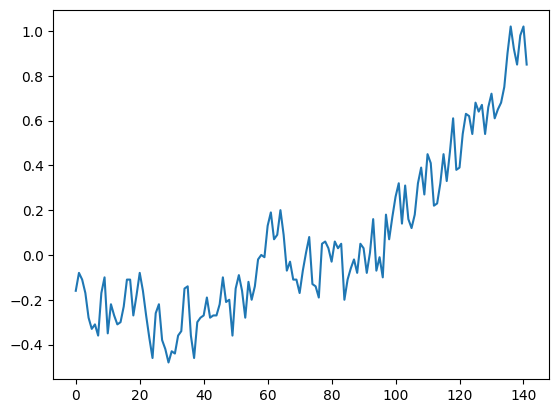

In [5]:
plt.style.use ('default')
plt.plot(data['J-D'])

<AxesSubplot: >

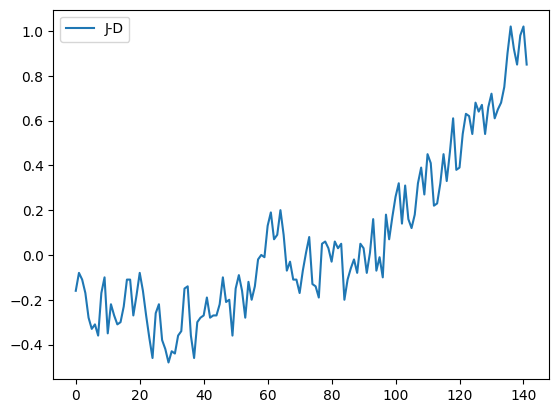

In [6]:
data.plot(y ='J-D')

As usual, it produces a graph that leaves a lot to be desired to make it look aethetically pleasing. Let us re-tread the path we have taken with the previous notebooks pertaining to the bar plots.

### Applying a dash of style 

We will do the following:

* resize the figure
* apply the `ggplot` theme
* add a bit of transparency, for aesthetics
* add a title
* slightly change the `xlabel` and `ylabel`.
* improve the text formatting with $\LaTeX$ typesetting
* finally, set a tight layout and remove output clutter

Let's create a dictionary called `plot_style` with the runtime configurations (`rcparams`) common for all plots. We will update the runtime configuration and make some minor modifications (if need be) while plotting.

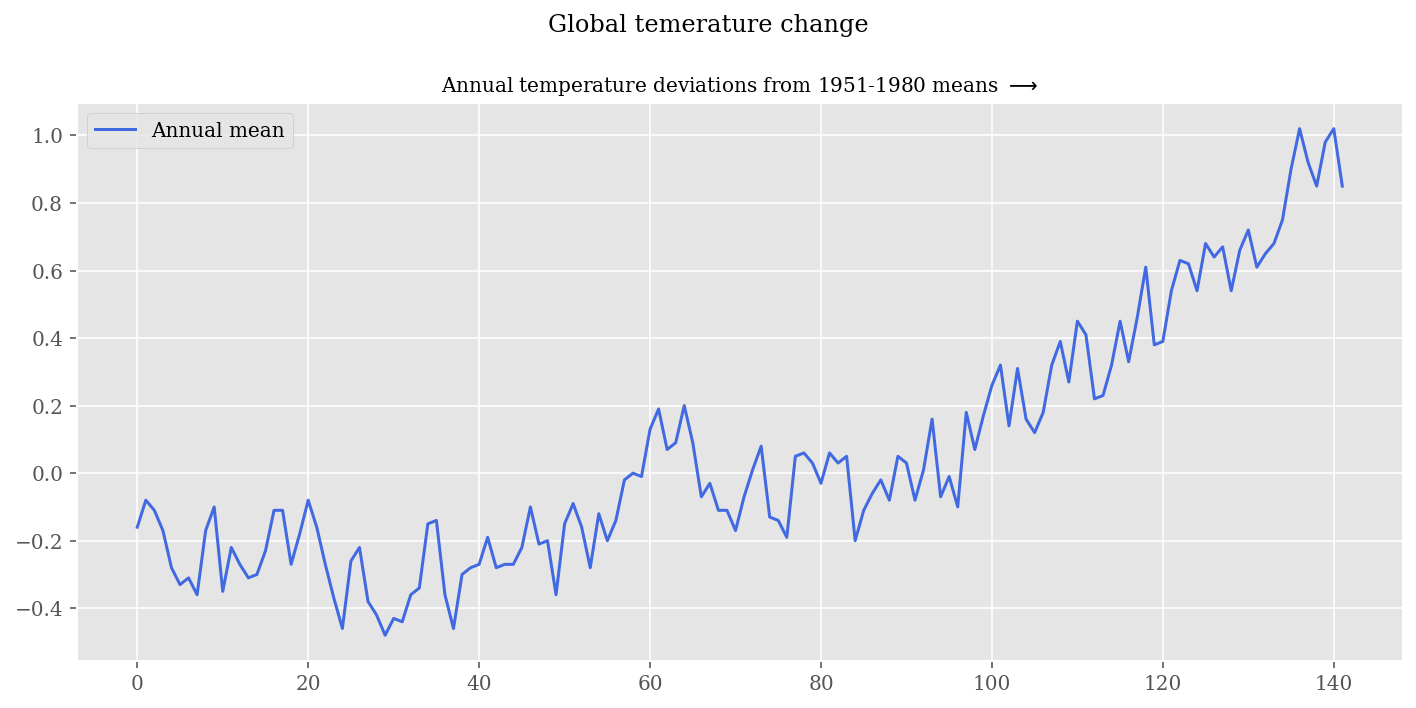

In [7]:
plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": False, 
    
    # configure fonts
    "font.size":12,                      # default font size
    "font.family":'serif',
    "legend.fontsize": 10,
    "axes.labelsize": 12,
    "axes.titlesize":14,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}
plt.style.use('ggplot')
plt.rcParams.update(plot_style)          # Update style of the plot with the plot_style defined.
data.plot(y ='J-D',
          label = 'Annual mean',         # Choose label
          color = 'royalblue'            # Choose color
)
plt.legend()                             # Shows Legends
plt.suptitle("Global temerature change", size=12) 
plt.title(f'Annual temperature deviations from 1951-1980 means $\longrightarrow$', size=10)
plt.tight_layout()


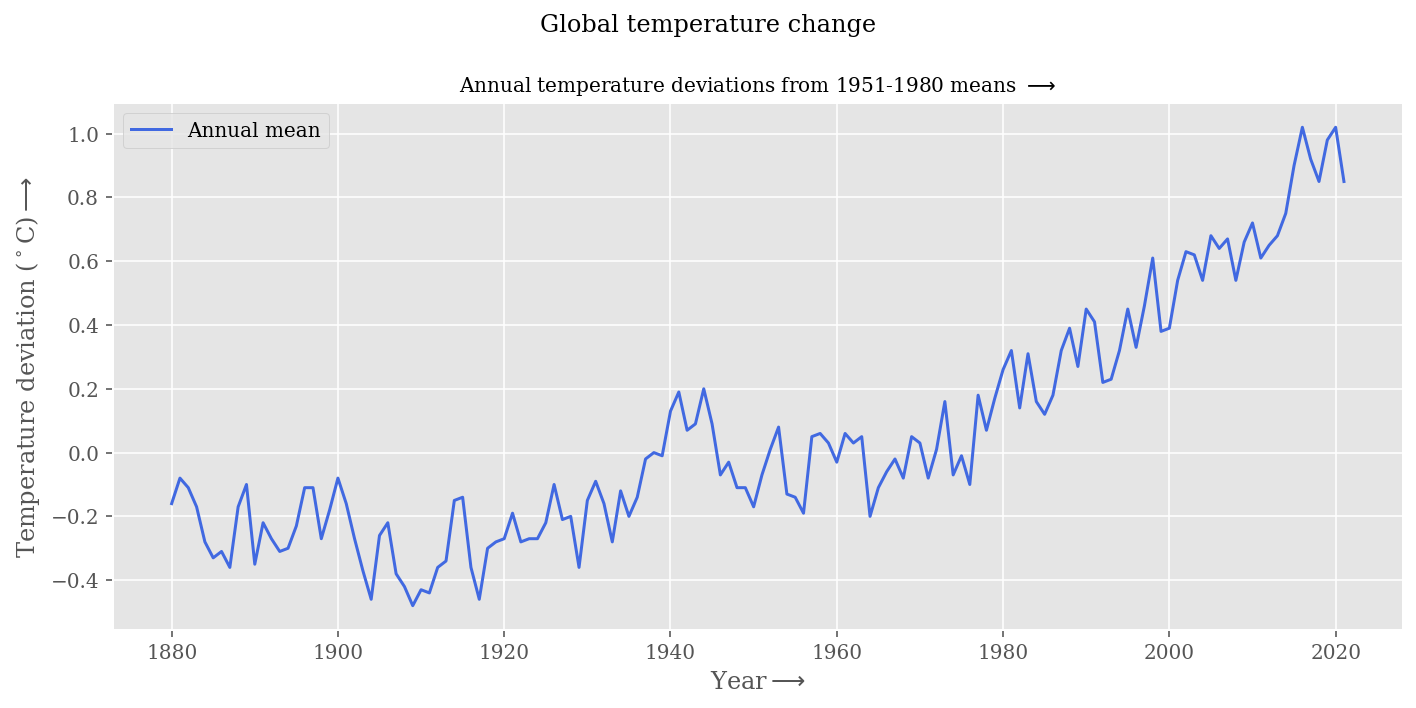

In [8]:
plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": False, 
    
    # configure fonts
    "font.size":12,                      # default font size
    "font.family":'serif',
    "legend.fontsize": 10,
    "axes.labelsize": 12,
    "axes.titlesize":14,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}
plt.style.use('ggplot')
plt.rcParams.update(plot_style)          # Update style of the plot with the plot_style defined.
data.plot(y ='J-D',
          x ='Year',
          label = 'Annual mean',         # Choose label
          color = 'royalblue'            # Choose color
)
plt.legend()                             # Shows Legends
plt.suptitle("Global temperature change", size=12) 
plt.title(f'Annual temperature deviations from 1951-1980 means $\longrightarrow$', size=10)
plt.ylabel(r"Temperature deviation ($^\circ$C)$\longrightarrow$")
plt.xlabel(f'Year$\longrightarrow$')
plt.tight_layout()

## Multiseries line plot
Lets plot the seasonal temperature devaitions  using matplotlib method `plt.plot()`. We layer the plots on top of each other for each season. 

In [9]:
#seasons = data.columns.to_list[14:]        # Columns 14 onwards denote seasons, you put them in a list
#seasons

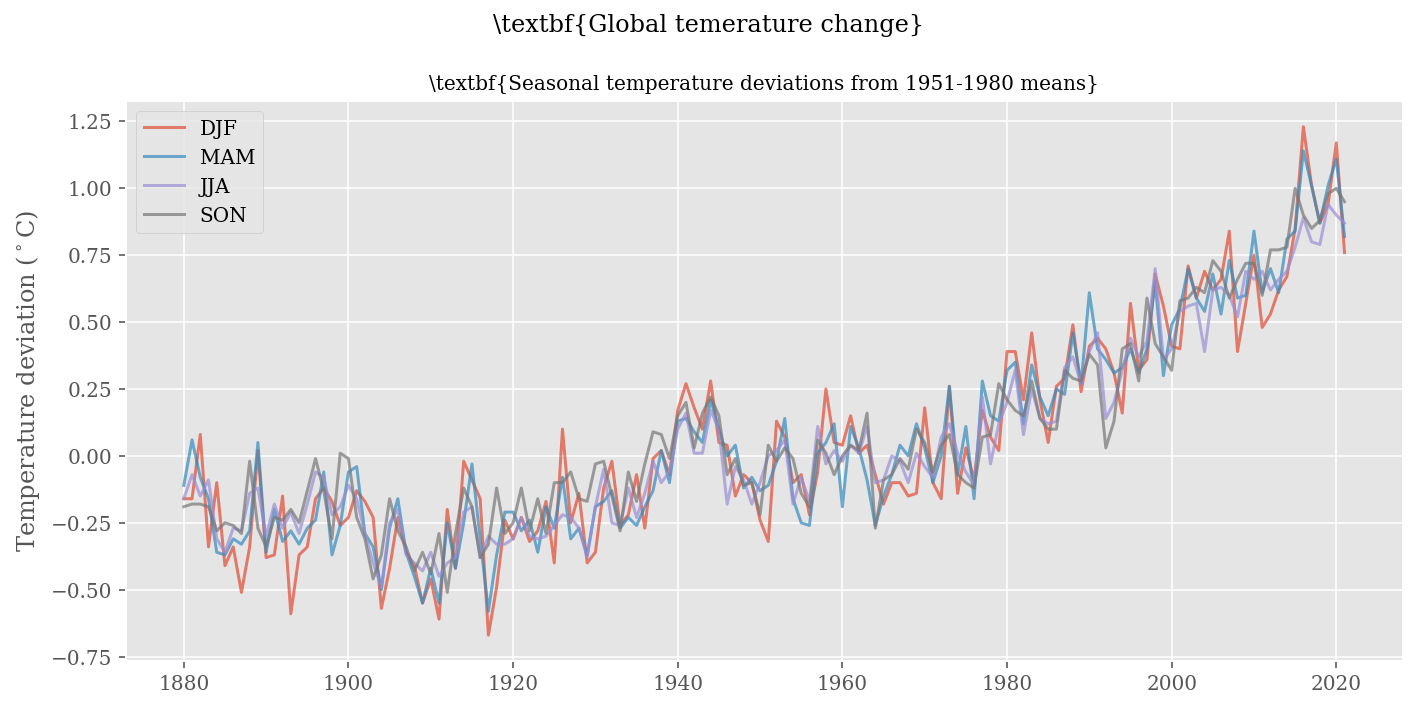

In [10]:
plt.style.use('ggplot')
plt.rcParams.update(plot_style)          # Update style of the plot with the plot_style defined.
seasons = data.columns.tolist()[14:]
#print(seasons)

for season_name in seasons:
    season = data[[season_name]]        #Creates a new data from for only seasons data
    season.set_index(data.Year,inplace =True)
    plt.plot(season ,label=season_name, alpha=0.7)
plt.legend()
plt.suptitle(r"\textbf{Global temerature change}", size=12); 
plt.title(r"\textbf{Seasonal temperature deviations from 1951-1980 means}", size=10),
plt.ylabel(r"Temperature deviation ($^\circ$C)")
plt.tight_layout();
    
    
    
    

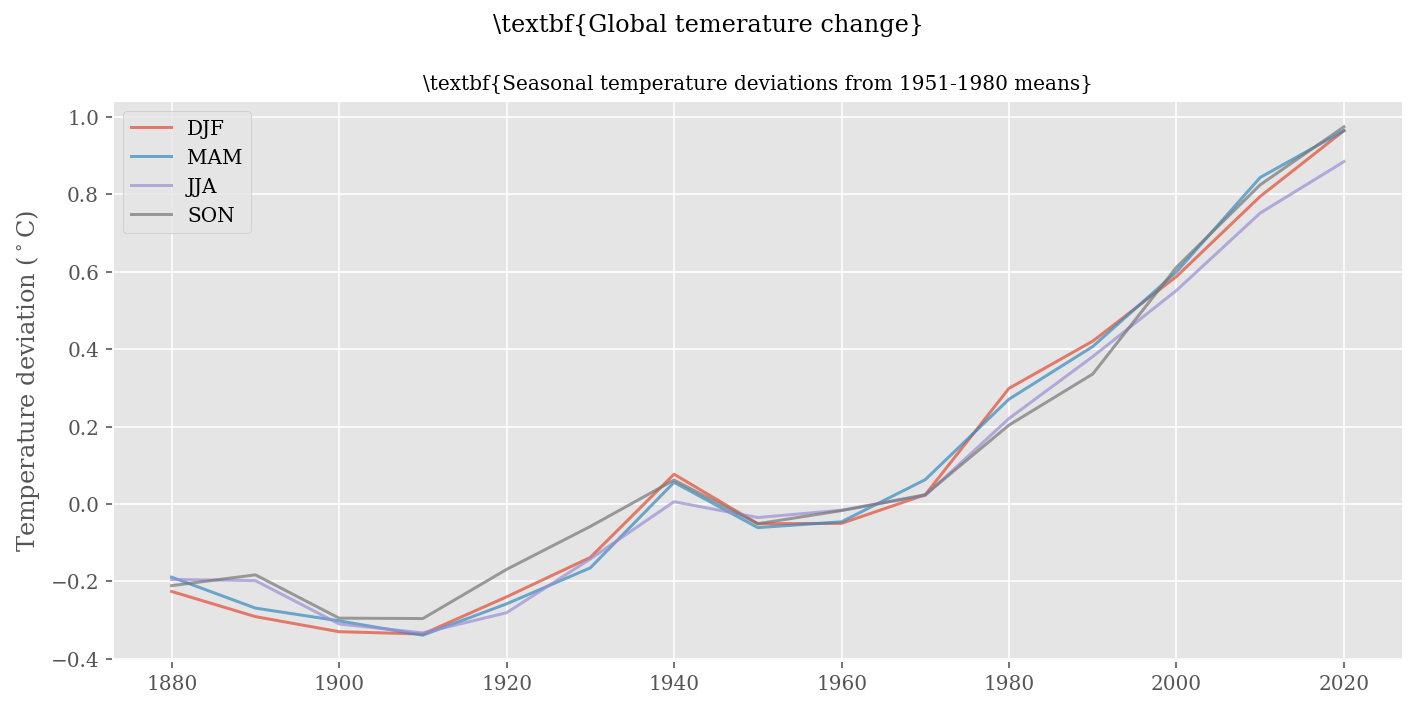

In [11]:
plt.style.use ('ggplot')
plt.rcParams.update(plot_style)

seasons = data.columns.tolist()[14:]

for season_name in seasons:
    season=data[[season_name]]                                          
    season.set_index(data.Year, inplace=True)                           
    seasonal_mean_values = season.groupby((season.index//10)*10).mean() # group by decade
    plt.plot(seasonal_mean_values, label=season_name, alpha=0.7)                   



plt.legend()
plt.suptitle(r"\textbf{Global temerature change}", size=12); 
plt.title(r"\textbf{Seasonal temperature deviations from 1951-1980 means}", size=10),
plt.ylabel(r"Temperature deviation ($^\circ$C)")
plt.tight_layout();

## Area plot

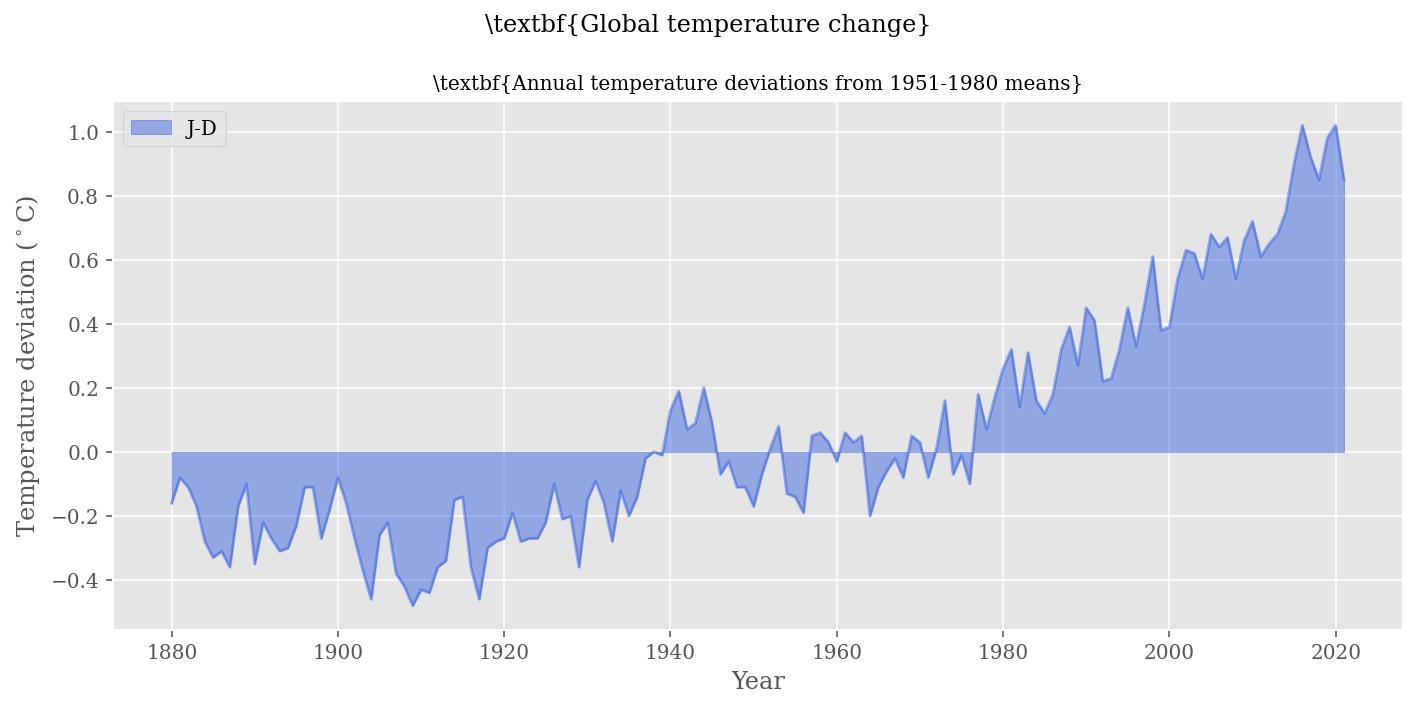

In [16]:
plt.style.use ('ggplot')
plt.rcParams.update(plot_style)
data.plot.area( y ='J-D', 
                x ='Year',
                color = 'royalblue',           # Choose color
                stacked = False
               
)
plt.legend()
plt.suptitle(r"\textbf{Global temperature change}", size=12); 
plt.title(r"\textbf{Annual temperature deviations from 1951-1980 means}", size=10),
plt.ylabel(r"Temperature deviation ($^\circ$C)")
plt.tight_layout();

## vlines
We can also use vertical lines as an alternative to area plot for a sharper look. We draw vertical lines for each year starting from 0 to the annual mean temperature deviation as shown below.   

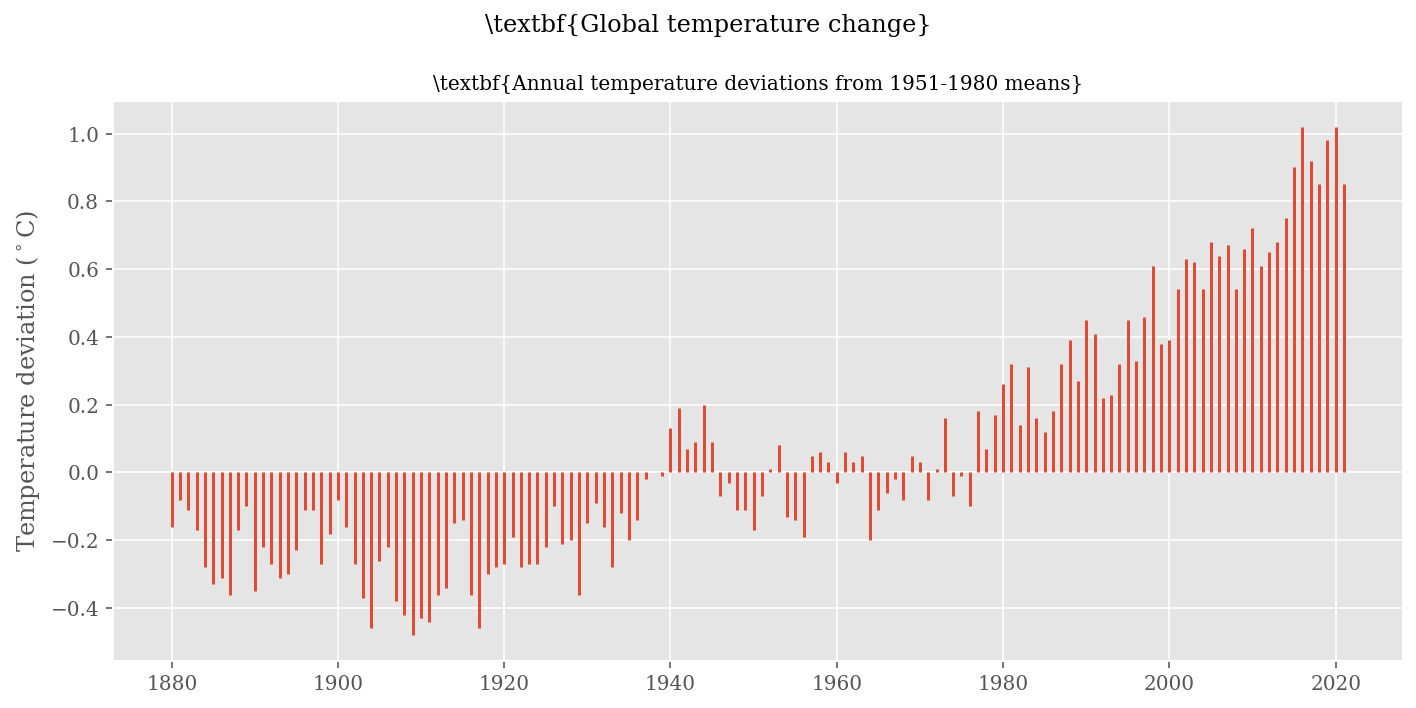

In [17]:
plt.style.use ('ggplot')
plt.rcParams.update(plot_style)

plt.vlines(x=data['Year'], 
           ymin=np.zeros(data['Year'].shape[0]), 
           ymax=data['J-D'])

plt.suptitle(r"\textbf{Global temperature change}", size=12); 
plt.title(r"\textbf{Annual temperature deviations from 1951-1980 means}", size=10),
plt.ylabel(r"Temperature deviation ($^\circ$C)")
plt.tight_layout();

### Customize colors using cmaps

We can make the chart more striking by adding colors. Lets use the `coolwarm` colormap for this exercise. We represent large positive deviations with deep red and large negative deviations with deep blue. We map the annual temperature deviations to a scale from 0 to 1 and store the normalized values in `color-vals`. We map `color-vals` to RGB values and pass it to `plt.vlines()`

We also customize the background and grid to suitable colors

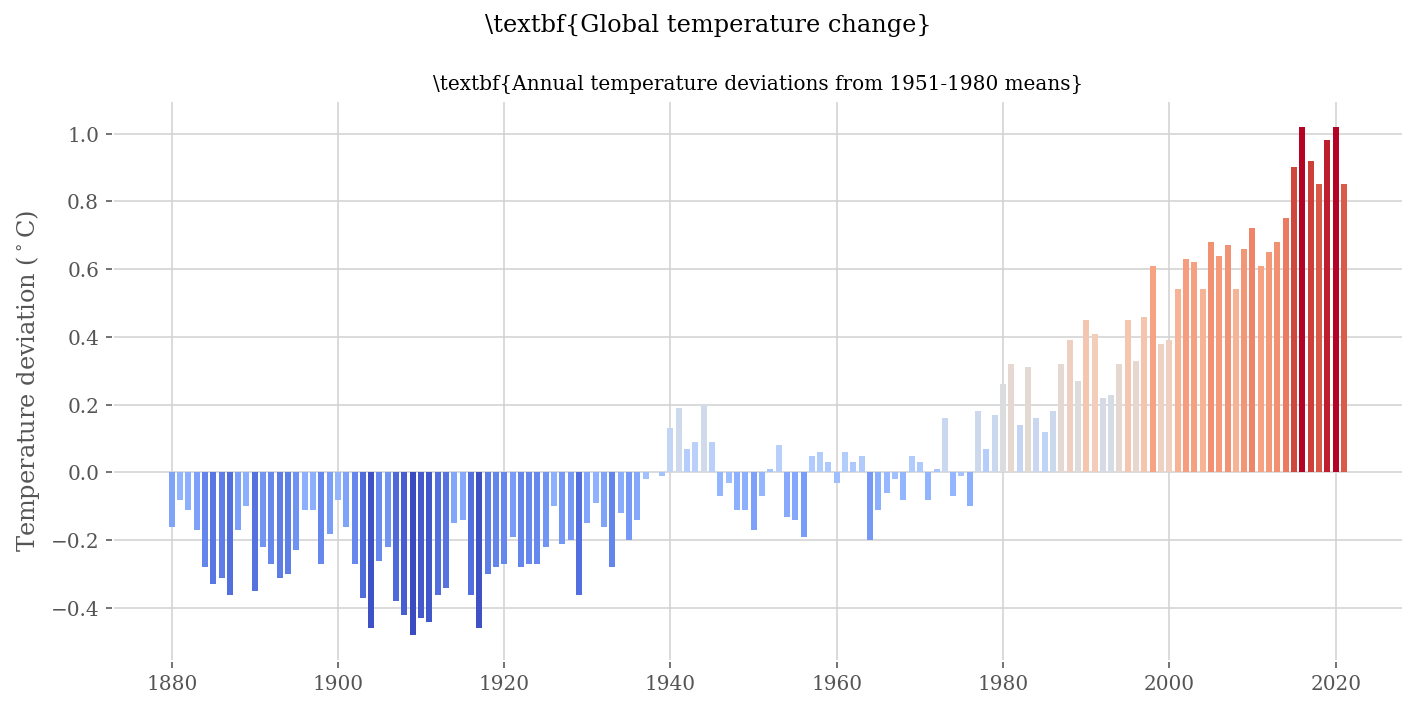

In [18]:
plt.style.use ('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams.update(plot_style)

color_vals = (data['J-D'] - data['J-D'].min()) / (data['J-D'].max() - data['J-D'].min()) # min-max normalization
colors = plt.cm.coolwarm(color_vals)

plt.vlines(x=data['Year'],
           ymin=np.zeros(data['Year'].shape[0]), 
           ymax=data['J-D'],
           color=colors,
           lw=3
          )

plt.suptitle(r"\textbf{Global temperature change}", size=12); 
plt.title(r"\textbf{Annual temperature deviations from 1951-1980 means}", size=10),
plt.ylabel(r"Temperature deviation ($^\circ$C)")
plt.tight_layout();

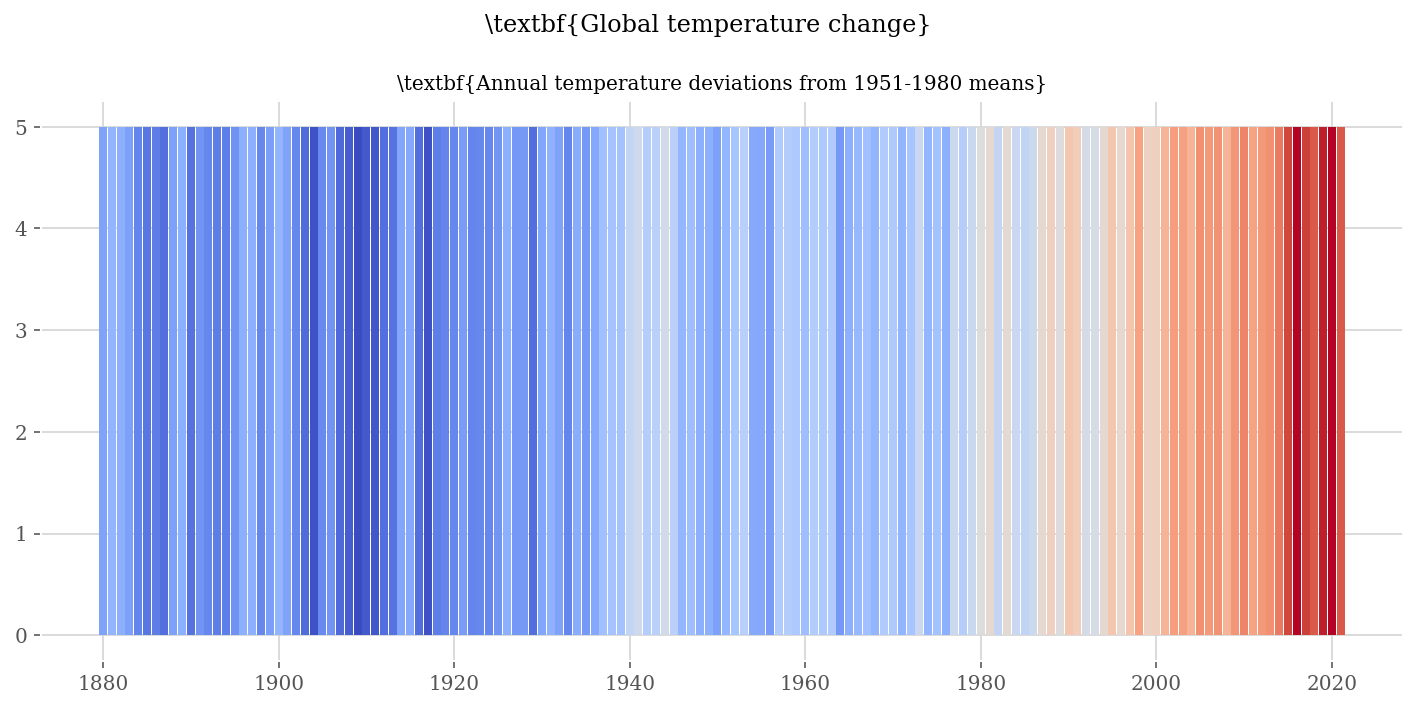

In [19]:
plt.style.use ('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams.update(plot_style)

color_vals = (data['J-D'] - data['J-D'].min()) / (data['J-D'].max() - data['J-D'].min()) # min-max normalization
colors = plt.cm.coolwarm(color_vals)

plt.vlines(x=data['Year'],
           ymin=0, 
           ymax=5,
           color=colors,
           lw=4
          )

plt.suptitle(r"\textbf{Global temperature change}", size=12); 
plt.title(r"\textbf{Annual temperature deviations from 1951-1980 means}", size=10),
plt.tight_layout();